In [ ]:
pip install fbprophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet


# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


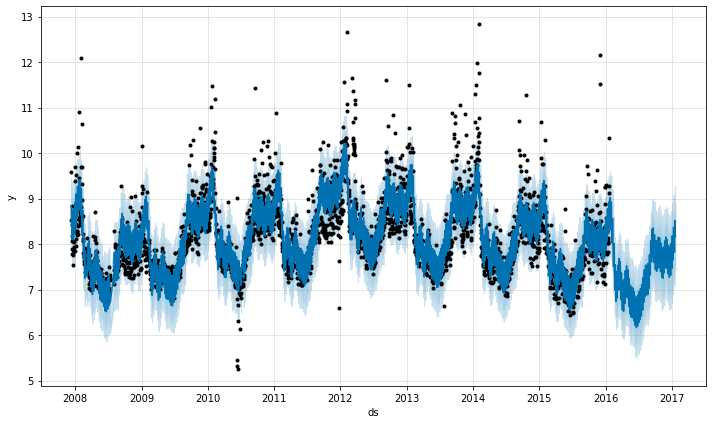

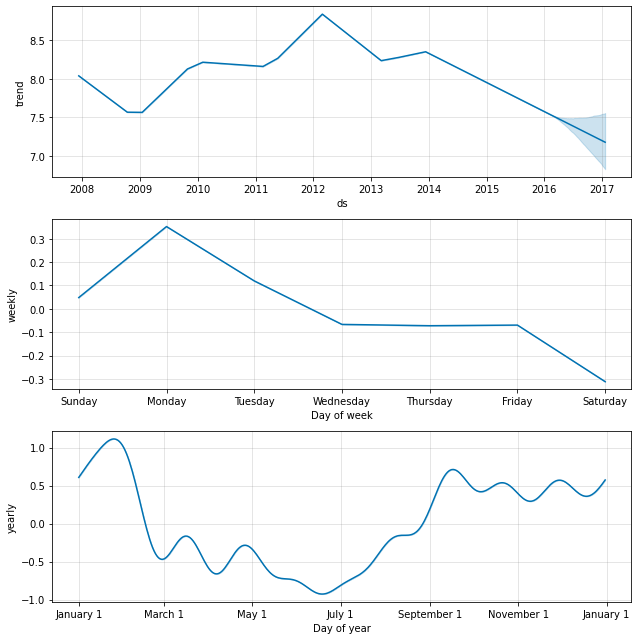

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.269487,9.454635,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,8.000081,9.214733,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200
2,2007-12-12,8.037518,7.796809,9.004107,8.037518,8.037518,0.350502,0.350502,0.350502,-0.066660,-0.066660,-0.066660,0.417162,0.417162,0.417162,0.0,0.0,0.0,8.388020
3,2007-12-13,8.035976,7.750364,8.995514,8.035976,8.035976,0.329951,0.329951,0.329951,-0.072258,-0.072258,-0.072258,0.402209,0.402209,0.402209,0.0,0.0,0.0,8.365927
4,2007-12-14,8.034434,7.755647,8.969842,8.034434,8.034434,0.319465,0.319465,0.319465,-0.069577,-0.069577,-0.069577,0.389042,0.389042,0.389042,0.0,0.0,0.0,8.353899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.182784,7.396819,8.916779,6.839566,7.552691,1.018140,1.018140,1.018140,0.048276,0.048276,0.048276,0.969865,0.969865,0.969865,0.0,0.0,0.0,8.200924
3266,2017-01-16,7.181749,7.842690,9.274481,6.836932,7.553269,1.344183,1.344183,1.344183,0.352293,0.352293,0.352293,0.991890,0.991890,0.991890,0.0,0.0,0.0,8.525932
3267,2017-01-17,7.180714,7.592610,8.986324,6.834269,7.554263,1.132616,1.132616,1.132616,0.119645,0.119645,0.119645,1.012971,1.012971,1.012971,0.0,0.0,0.0,8.313330
3268,2017-01-18,7.179679,7.438469,8.862328,6.831507,7.556738,0.966244,0.966244,0.966244,-0.066660,-0.066660,-0.066660,1.032904,1.032904,1.032904,0.0,0.0,0.0,8.145923


In [ ]:
# Model fit
m = Prophet() #Instanticate from Prophet class. 
m.fit(df) # Fit the Prophet model.
# Predict
future = m.make_future_dataframe(periods=365) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
forecast = m.predict(future) # Predict future value.

# Plot results
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()
forecast # Displaying various results in table format.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


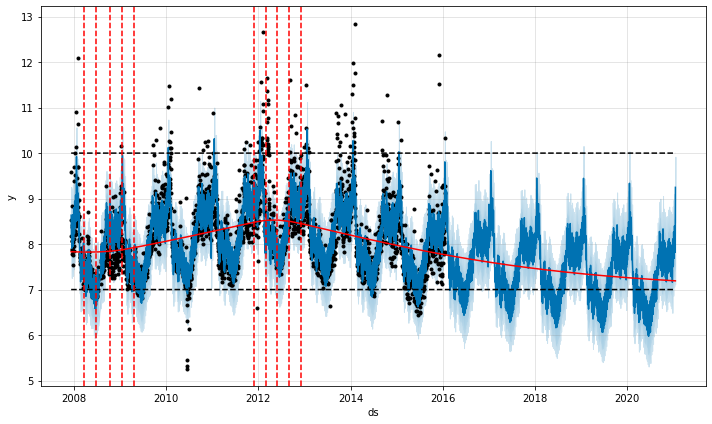

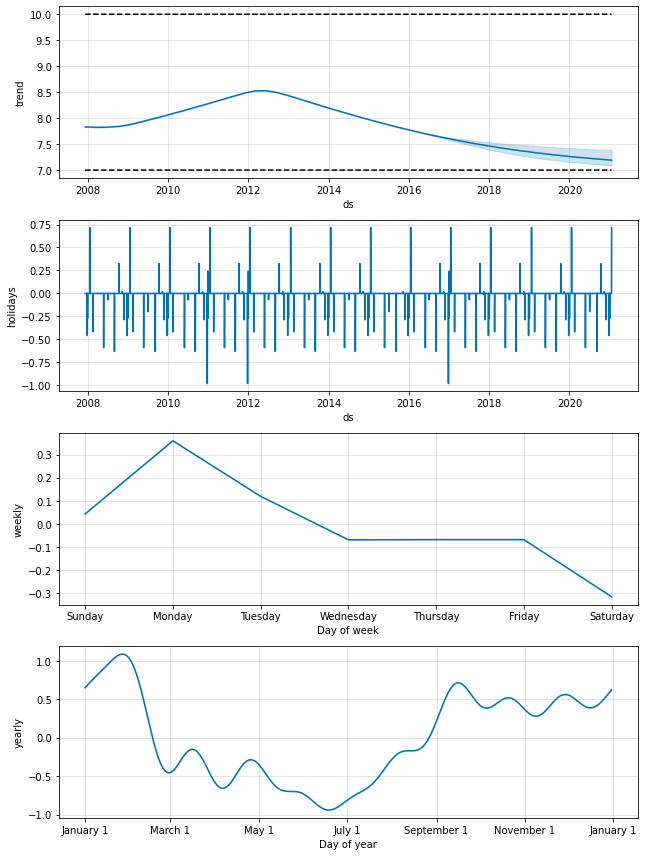

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")
df['cap'] = 10 # Saturating maximum
df['floor'] = 7 # Saturating minimum

# Model setup
m = Prophet(growth='logistic')
m.add_country_holidays(country_name='US') # Adding US holiday regressor
m.fit(df) 

# Future data generation
future = m.make_future_dataframe(periods=365*5)
future['cap'] = 10 # Saturating maximum
future['floor'] = 7 # Saturating minimum

# Future forecast
forecast = m.predict(future) 

# Visualize
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


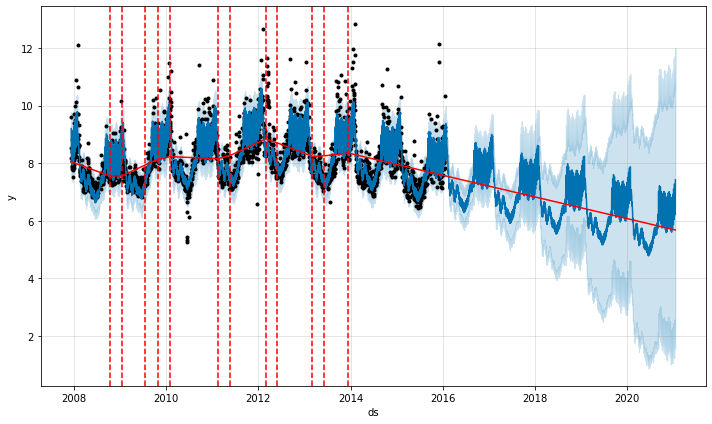

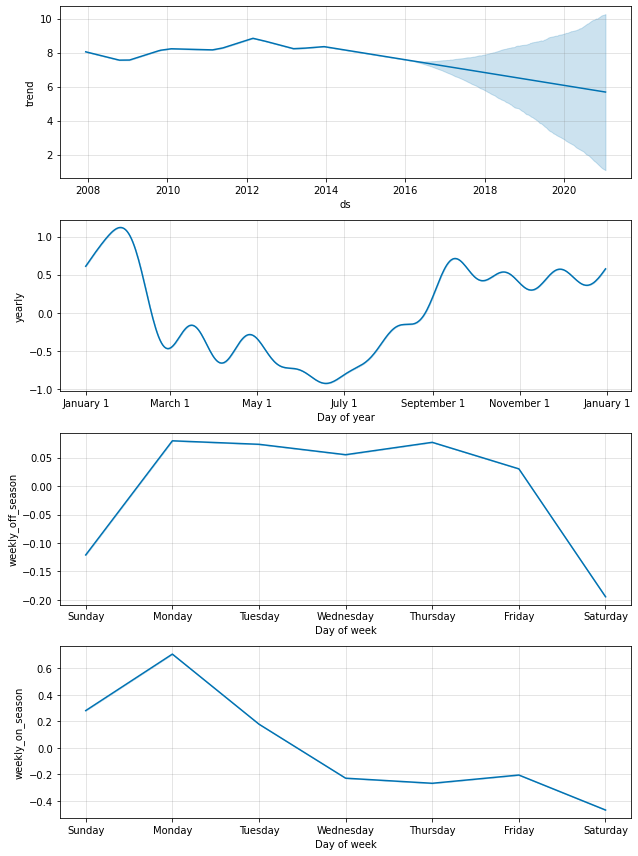

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season) #on_season dummy.
df['off_season'] = ~df['ds'].apply(is_nfl_season) #off_season dummy.

# set user-defined seasonality and fit
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.fit(df)

# Make the same columns to future data.
future = m.make_future_dataframe(periods=365*5) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)

# Predict future value.
forecast = m.predict(future)

# Plot results
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.497764,0.705524,0.507716,0.058841,0.050552,0.676565
1,38 days,0.503574,0.709629,0.512709,0.059419,0.049901,0.675423
2,39 days,0.525841,0.725149,0.518796,0.060018,0.050283,0.672682
3,40 days,0.533159,0.730177,0.521690,0.060328,0.049582,0.678849
4,41 days,0.540669,0.735302,0.522711,0.060410,0.049901,0.686386


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,1.123240,1.059830,0.857721,0.102881,0.086130,0.507081
325,362 days,1.138430,1.066972,0.864277,0.103475,0.087067,0.505254
326,363 days,1.159649,1.076870,0.871724,0.104231,0.087198,0.502056
327,364 days,1.176057,1.084462,0.879313,0.105158,0.089174,0.496345
328,365 days,1.188549,1.090206,0.888150,0.106183,0.089174,0.488808


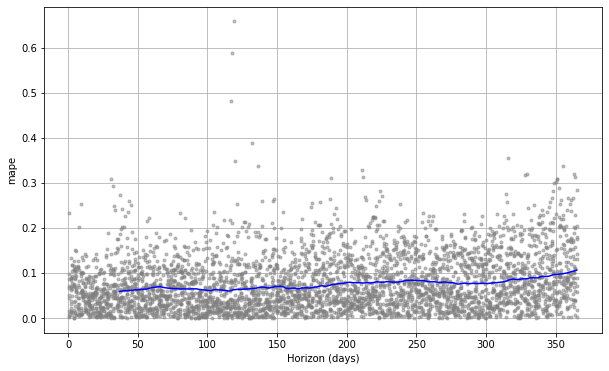

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

m = Prophet()
m.fit(df)

# Execute cross validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



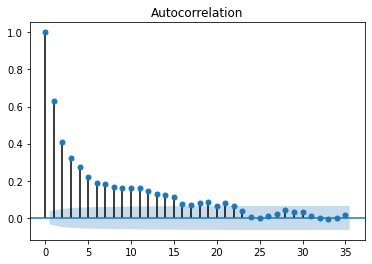

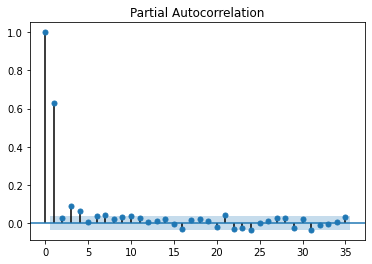

In [ ]:

# After getting forecast dataframe using user-defined seasonality "on-season"/"off-season" above...

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

df['ds'] = pd.to_datetime(df['ds'],format='%Y-%m-%d')
df_res = df.merge(forecast,how="inner",on="ds")
df_res['residual'] = df_res['y'] - df_res['yhat']
plot_acf(df_res['residual'])
plot_pacf(df_res['residual'])
plt.show()

In [ ]:
import pandas as pd

import numpy as np
from fbprophet import Prophet
%matplotlib inline
import matplotlib.pyplot as plt
sample=pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

In [ ]:
sample.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
import datetime
sample['Unnamed: 0'] = pd.date_range('2017-01-01', periods=200, freq='W')

In [ ]:
sample['Spending'] = sample['TV'] + sample['Radio'] + sample['Newspaper']

In [ ]:
sample = sample.rename(columns={'Unnamed: 0': 'Date'})

In [ ]:
sample.head()

,Date,TV,Radio,Newspaper,Sales,Spending
0,2017-01-01,230.1,37.8,69.2,22.1,337.1
1,2017-01-08,44.5,39.3,45.1,10.4,128.9
2,2017-01-15,17.2,45.9,69.3,9.3,132.4
3,2017-01-22,151.5,41.3,58.5,18.5,251.3
4,2017-01-29,180.8,10.8,58.4,12.9,250.0


In [ ]:
# sample = sample.set_index('Date')

In [ ]:
df = sample[['Date','Spending']]

In [ ]:
df = df.rename(columns={'Date': 'ds', 'Spending':'y'})

In [ ]:
df.head()

,ds,y
0,2017-01-01,337.1
1,2017-01-08,128.9
2,2017-01-15,132.4
3,2017-01-22,251.3
4,2017-01-29,250.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


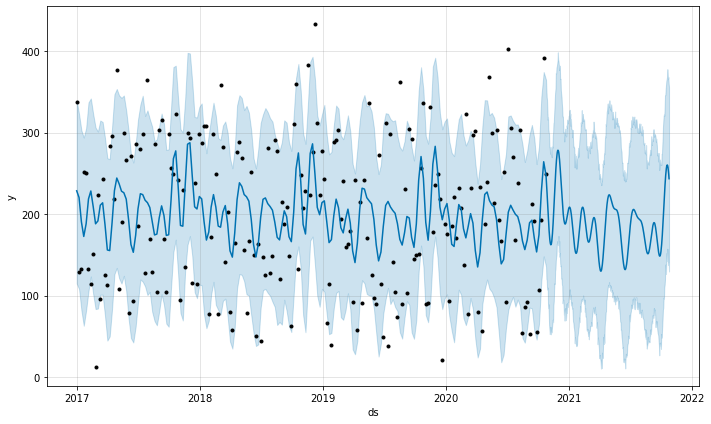

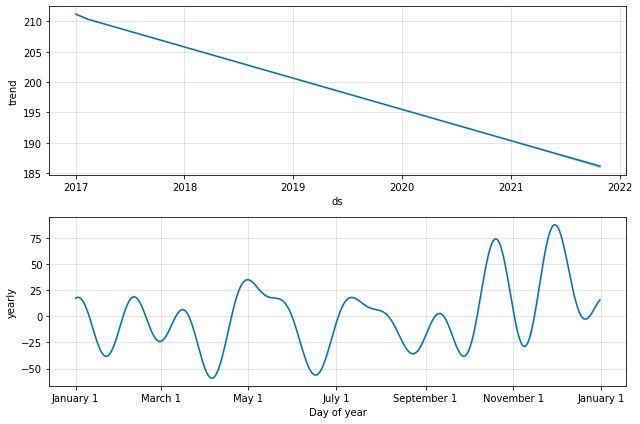

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,211.201107,114.764213,339.255647,211.201107,211.201107,17.286249,17.286249,17.286249,17.286249,17.286249,17.286249,0.0,0.0,0.0,228.487356
1,2017-01-08,211.058859,108.014108,322.725194,211.058859,211.058859,9.192829,9.192829,9.192829,9.192829,9.192829,9.192829,0.0,0.0,0.0,220.251688
2,2017-01-15,210.916611,81.782737,302.689976,210.916611,210.916611,-20.497523,-20.497523,-20.497523,-20.497523,-20.497523,-20.497523,0.0,0.0,0.0,190.419088
3,2017-01-22,210.774362,62.886538,293.832134,210.774362,210.774362,-38.291367,-38.291367,-38.291367,-38.291367,-38.291367,-38.291367,0.0,0.0,0.0,172.482996
4,2017-01-29,210.632114,81.872953,305.380714,210.632114,210.632114,-22.600277,-22.600277,-22.600277,-22.600277,-22.600277,-22.600277,0.0,0.0,0.0,188.031837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2021-10-21,186.195444,147.576580,370.789074,185.974457,186.424446,72.927310,72.927310,72.927310,72.927310,72.927310,72.927310,0.0,0.0,0.0,259.122754
561,2021-10-22,186.181337,137.656931,365.488412,185.959523,186.411874,70.671888,70.671888,70.671888,70.671888,70.671888,70.671888,0.0,0.0,0.0,256.853225
562,2021-10-23,186.167230,141.138410,368.090899,185.944517,186.399302,67.240154,67.240154,67.240154,67.240154,67.240154,67.240154,0.0,0.0,0.0,253.407384
563,2021-10-24,186.153123,140.300429,359.880842,185.929243,186.386730,62.712055,62.712055,62.712055,62.712055,62.712055,62.712055,0.0,0.0,0.0,248.865178


In [ ]:
# Model fit
m = Prophet() #Instanticate from Prophet class. 
m.fit(df) # Fit the Prophet model.
# Predict
future = m.make_future_dataframe(periods=365) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
forecast = m.predict(future) # Predict future value.

# Plot results
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()
forecast # Displaying various results in table format.